> ### **Objective**
> **Can you develop a model of machine learning that can predict customers who will leave the company?**
> 
> The aim is to estimate whether a telecom customer leaves the company  or not. tere are 20 feture for these data set 3 of them are categoric and the rest are numeric.

> ### **Importing Librariese**

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import pointbiserialr

> ### **Reading Dta set**

In [39]:
df=pd.read_csv("/kaggle/input/it-customer-churn/IT_customer_churn.csv")
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [41]:
df.shape

(7043, 20)

> ### **Data Cleaning**

> for the Data cleaning first we find the null number. the the is typing error that has been fixed.finding the outlier for the numeric data and the using get dumies the categoric data has been encoded.

In [42]:
df.isnull().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [43]:
# Replace "No phone service" with "No" in the "MultipleLines" column
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

In [44]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [45]:
data_columns=('tenure', 'MonthlyCharges', 'TotalCharges' )
def identify_outliers(data_column):
    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (data_column < lower_bound) | (data_column > upper_bound)
    return outliers

In [46]:
outliers_tenure = identify_outliers(df['tenure'])
print(df[outliers_tenure])

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


In [47]:
outliers_tenure = identify_outliers(df['MonthlyCharges'])
print(df[outliers_tenure])

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


In [48]:
# Convert 'NumericColumn' to numeric, ignoring errors for non-numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [49]:
outliers_tenure = identify_outliers(df['TotalCharges'])
print(df[outliers_tenure])

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


In [50]:
# Use get_dummies for all categorical columns including the target
df= pd.get_dummies(df, columns=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService' ,
                                'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV' ,'StreamingMovies' ,
                                'Contract','PaperlessBilling' ,'PaymentMethod','Churn'])

In [51]:
#what is different between one-hot encoding or label encodin and get_dummies 

In [52]:
df

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,1,29.85,29.85,True,False,True,False,False,True,True,...,False,False,False,True,False,False,True,False,True,False
1,34,56.95,1889.50,False,True,True,False,True,False,True,...,True,False,True,False,False,False,False,True,True,False
2,2,53.85,108.15,False,True,True,False,True,False,True,...,False,False,False,True,False,False,False,True,False,True
3,45,42.30,1840.75,False,True,True,False,True,False,True,...,True,False,True,False,True,False,False,False,True,False
4,2,70.70,151.65,True,False,True,False,True,False,True,...,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,False,True,True,False,False,True,False,...,True,False,False,True,False,False,False,True,True,False
7039,72,103.20,7362.90,True,False,True,False,False,True,False,...,True,False,False,True,False,True,False,False,True,False
7040,11,29.60,346.45,True,False,True,False,False,True,False,...,False,False,False,True,False,False,True,False,True,False
7041,4,74.40,306.60,False,True,False,True,False,True,True,...,False,False,False,True,False,False,False,True,False,True


In [53]:
#why bring true and false as result ?

In [54]:
boolean_columns = df.select_dtypes(include='bool').columns
df[boolean_columns] = df[boolean_columns].astype(int)

In [55]:
df

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,1,29.85,29.85,1,0,1,0,0,1,1,...,0,0,0,1,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,1,0,1,0,1,...,1,0,1,0,0,0,0,1,1,0
2,2,53.85,108.15,0,1,1,0,1,0,1,...,0,0,0,1,0,0,0,1,0,1
3,45,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,1,0,1,0,0,0,1,0
4,2,70.70,151.65,1,0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,1,1,0,0,1,0,...,1,0,0,1,0,0,0,1,1,0
7039,72,103.20,7362.90,1,0,1,0,0,1,0,...,1,0,0,1,0,1,0,0,1,0
7040,11,29.60,346.45,1,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
7041,4,74.40,306.60,0,1,0,1,0,1,1,...,0,0,0,1,0,0,0,1,0,1


> ### **Feture Selection**
>  in this step with two different method we want to choose what is the most effective feture in the model . first withe correlation of churn_yes with other variables we can have idea what are the most correlated fetures with target. as the correlation is not the only thing we can trust for choosing fetures we use SelectKBest to see if this teqnique give us same result.

In [56]:
# Calculate the correlation matrix with the target variable
correlation_matrix = df.corr()

# Extract correlations with the target variable ('Churn')
correlation_with_target = correlation_matrix['Churn_Yes'].sort_values(ascending=True)

# Print the correlations
print("Correlation with Churn:")
print(correlation_with_target)



Correlation with Churn:
Churn_No                                  -1.000000
tenure                                    -0.352229
Contract_Two year                         -0.302253
OnlineBackup_No internet service          -0.227890
DeviceProtection_No internet service      -0.227890
InternetService_No                        -0.227890
StreamingTV_No internet service           -0.227890
TechSupport_No internet service           -0.227890
OnlineSecurity_No internet service        -0.227890
StreamingMovies_No internet service       -0.227890
TotalCharges                              -0.199484
PaperlessBilling_No                       -0.191825
Contract_One year                         -0.177820
OnlineSecurity_Yes                        -0.171226
TechSupport_Yes                           -0.164674
Dependents_Yes                            -0.164221
SeniorCitizen_0                           -0.150889
Partner_Yes                               -0.150448
PaymentMethod_Credit card (automatic)   

In [57]:
# Check for NaNs in the encoded data
nan_values = df.isnull().sum()
print("NaN values in the encoded data:")
print(nan_values)


NaN values in the encoded data:
tenure                                      0
MonthlyCharges                              0
TotalCharges                               11
gender_Female                               0
gender_Male                                 0
SeniorCitizen_0                             0
SeniorCitizen_1                             0
Partner_No                                  0
Partner_Yes                                 0
Dependents_No                               0
Dependents_Yes                              0
PhoneService_No                             0
PhoneService_Yes                            0
MultipleLines_No                            0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                          0
On

In [58]:
import pandas as pd

# Assuming df is your DataFrame with null values
# Fill null values with the mean of each column
df.fillna(df.mean(), inplace=True)


In [59]:
from scipy.stats import pointbiserialr

# Selecting all columns except the target variable
features = df.columns[df.columns != 'Churn_Yes']

# Calculating point-biserial correlation coefficient for each feature
correlation_with_churn = {}
for feature in features:
    corr, _ = pointbiserialr(df[feature], df['Churn_Yes'])
    correlation_with_churn[feature] = corr

# Converting the dictionary to a DataFrame for easier analysis
correlation_df = pd.DataFrame.from_dict(correlation_with_churn, orient='index', columns=['Correlation_with_Churn'])

# Sorting the DataFrame by absolute correlation values
correlation_df['Abs_Correlation_with_Churn'] = correlation_df['Correlation_with_Churn'].abs()
correlation_df = correlation_df.sort_values(by='Abs_Correlation_with_Churn', ascending=False)

print(correlation_df)

                                         Correlation_with_Churn  \
Churn_No                                              -1.000000   
Contract_Month-to-month                                0.405103   
tenure                                                -0.352229   
OnlineSecurity_No                                      0.342637   
TechSupport_No                                         0.337281   
InternetService_Fiber optic                            0.308020   
Contract_Two year                                     -0.302253   
PaymentMethod_Electronic check                         0.301919   
OnlineBackup_No                                        0.268005   
DeviceProtection_No                                    0.252481   
StreamingMovies_No internet service                   -0.227890   
StreamingTV_No internet service                       -0.227890   
OnlineBackup_No internet service                      -0.227890   
TechSupport_No internet service                       -0.22789

In [60]:
# when we encode data can we remove one category and keep the other category?

In [61]:
# Iterate over the column names and print their corresponding index
for index, column_name in enumerate(df.columns):
    print(f"Column '{column_name}' has index {index}.")

Column 'tenure' has index 0.
Column 'MonthlyCharges' has index 1.
Column 'TotalCharges' has index 2.
Column 'gender_Female' has index 3.
Column 'gender_Male' has index 4.
Column 'SeniorCitizen_0' has index 5.
Column 'SeniorCitizen_1' has index 6.
Column 'Partner_No' has index 7.
Column 'Partner_Yes' has index 8.
Column 'Dependents_No' has index 9.
Column 'Dependents_Yes' has index 10.
Column 'PhoneService_No' has index 11.
Column 'PhoneService_Yes' has index 12.
Column 'MultipleLines_No' has index 13.
Column 'MultipleLines_Yes' has index 14.
Column 'InternetService_DSL' has index 15.
Column 'InternetService_Fiber optic' has index 16.
Column 'InternetService_No' has index 17.
Column 'OnlineSecurity_No' has index 18.
Column 'OnlineSecurity_No internet service' has index 19.
Column 'OnlineSecurity_Yes' has index 20.
Column 'OnlineBackup_No' has index 21.
Column 'OnlineBackup_No internet service' has index 22.
Column 'OnlineBackup_Yes' has index 23.
Column 'DeviceProtection_No' has index 2

In [62]:
df.shape

(7043, 47)

> ### **CHeck how balance is the Distribution of Churn**

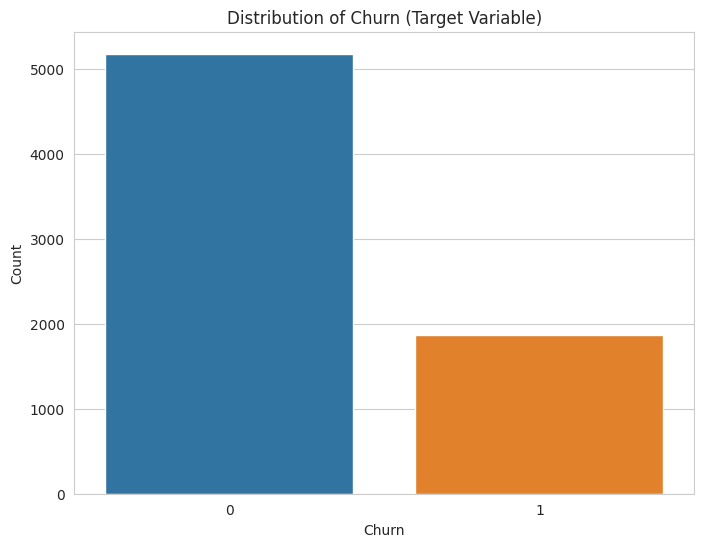

In [63]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Plot the count of each class in the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn_Yes')
plt.title('Distribution of Churn (Target Variable)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [64]:
X = df  # Use your DataFrame containing the features

# Define the target variable column name
target_column = 'Churn_Yes'

# y: Target variable
y = df[target_column]  # Select the target column from your DataFrame

# Remove the target variable column from the features
X = X.drop(columns=[target_column])

In [67]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Assuming X and y are your feature matrix and target vector respectively
# Define the number of top features you want to select
k = 20

# Initialize SelectKBest with the desired score function
selector = SelectKBest(score_func=f_classif, k=k)

# Fit the selector to the data
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_features_indices]

# Create a DataFrame with the selected features
X = pd.DataFrame(X_new, columns=selected_features)

# Print the selected features
print("Selected Features:")
print(X.head())

Selected Features:
   tenure  MonthlyCharges  TotalCharges  InternetService_Fiber optic  \
0     1.0           29.85         29.85                          0.0   
1    34.0           56.95       1889.50                          0.0   
2     2.0           53.85        108.15                          0.0   
3    45.0           42.30       1840.75                          0.0   
4     2.0           70.70        151.65                          1.0   

   InternetService_No  OnlineSecurity_No  OnlineSecurity_No internet service  \
0                 0.0                1.0                                 0.0   
1                 0.0                0.0                                 0.0   
2                 0.0                0.0                                 0.0   
3                 0.0                0.0                                 0.0   
4                 0.0                1.0                                 0.0   

   OnlineBackup_No  OnlineBackup_No internet service  DeviceProtect

/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


> ### **Building New Data set with selected fetures**

In [68]:
# Drop the "Churn_No" column
X.drop(columns=["Churn_No"], inplace=True)

In [69]:
X["Churn_Yes"] = df["Churn_Yes"]

In [70]:
# Define X as features excluding "Churn_Yes"
X1 = X.drop(columns=["Churn_Yes"])

# Define y as the target variable "Churn_Yes"
y = X["Churn_Yes"]

> ### **Split data to test and train**

In [71]:
# Split the data into training and testing sets
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)


In [72]:
# Instantiate the logistic regression model
logistic_regression = LogisticRegression()

# Train the model on the training data
logistic_regression.fit(X1_train, y_train)

# Predict the target variable on the testing data
y_pred = logistic_regression.predict(X1_test)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


> ### **Fit the models and Calculation of evaluation metrics**

In [73]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [74]:
# Print the evaluation metrics
print("Evaluation Metrics for Logistic Regression:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Evaluation Metrics for Logistic Regression:
Accuracy: 0.8133427963094393
Precision: 0.6762820512820513
Recall: 0.5656836461126006
F1 Score: 0.616058394160584


In [75]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Instantiate Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Train the model on the training data
gb_classifier.fit(X1_train, y_train)

# Predict the target variable on the testing data
y_pred_gb = gb_classifier.predict(X1_test)

In [76]:
# Print the evaluation metrics
print("Evaluation Metrics for GBM :")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Evaluation Metrics for GBM :
Accuracy: 0.8133427963094393
Precision: 0.6762820512820513
Recall: 0.5656836461126006
F1 Score: 0.616058394160584


In [78]:
# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X1_train, y_train)
# Predict the target variable on the testing data
y_pred_gb = gb_classifier.predict(X1_test)

In [79]:
# Print the evaluation metrics
print("Evaluation Metrics for GBM :")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Evaluation Metrics for GBM :
Accuracy: 0.8133427963094393
Precision: 0.6762820512820513
Recall: 0.5656836461126006
F1 Score: 0.616058394160584
